In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data = data.replace([np.inf, -np.inf], np.nan)

In [7]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

23899 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: [] 



,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
data = data.dropna()

In [9]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
data['HeartDiseaseorAttack'].value_counts()

0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

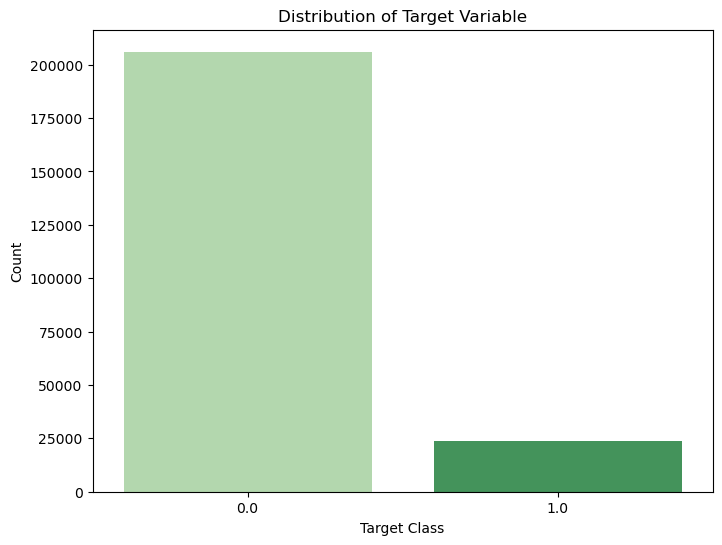

In [11]:
# Plotting the distribution of the binary target variable y
plt.figure(figsize=(8, 6))
sns.countplot(x=data['HeartDiseaseorAttack'], palette='Greens')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

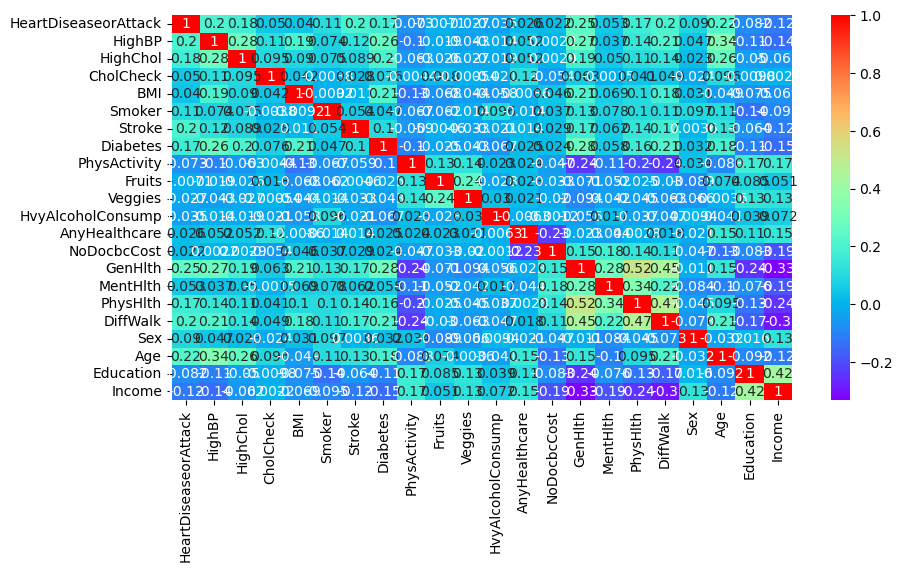

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [13]:
#data statistics
cor_matrix = data.corr().abs()
cor_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,0.170816,0.073267,0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,0.082466,0.122908
HighBP,0.201271,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.261976,0.104131,0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,0.112676,0.139782
HighChol,0.176279,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.203327,0.063266,0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,0.049838,0.061871
CholCheck,0.049995,0.111220,0.094753,1.000000,0.042420,0.003776,0.027894,0.075701,0.004409,0.017973,...,0.115539,0.054198,0.062782,0.001549,0.040612,0.048969,0.024255,0.095996,0.009758,0.002161
BMI,0.039926,0.194126,0.089615,0.042420,1.000000,0.009196,0.011062,0.212027,0.127864,0.067528,...,0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,0.049347,0.074568,0.069192
Smoker,0.105154,0.074237,0.074627,0.003776,0.009196,1.000000,0.054438,0.046774,0.066981,0.061947,...,0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,0.135793,0.095418
Stroke,0.198863,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.100276,0.059440,0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,0.064319,0.117232
Diabetes,0.170816,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,1.000000,0.103408,0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,0.107742,0.147102
PhysActivity,0.073267,0.104131,0.063266,0.004409,0.127864,0.066981,0.059440,0.103408,1.000000,0.125283,...,0.024095,0.046620,0.237676,0.106175,0.199562,0.235943,0.033586,0.087539,0.171224,0.166171
Fruits,0.007128,0.019329,0.026125,0.017973,0.067528,0.061947,0.004613,0.025462,0.125283,1.000000,...,0.022756,0.032521,0.071433,0.052409,0.024744,0.030188,0.088628,0.073726,0.085174,0.051230


In [14]:
#remove duplicate correlation diagonal
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,NaN,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,0.170816,0.073267,0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,0.082466,0.122908
HighBP,NaN,NaN,0.284186,0.111220,0.194126,0.074237,0.124426,0.261976,0.104131,0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,0.112676,0.139782
HighChol,NaN,NaN,NaN,0.094753,0.089615,0.074627,0.089258,0.203327,0.063266,0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,0.049838,0.061871
CholCheck,NaN,NaN,NaN,NaN,0.042420,0.003776,0.027894,0.075701,0.004409,0.017973,...,0.115539,0.054198,0.062782,0.001549,0.040612,0.048969,0.024255,0.095996,0.009758,0.002161
BMI,NaN,NaN,NaN,NaN,NaN,0.009196,0.011062,0.212027,0.127864,0.067528,...,0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,0.049347,0.074568,0.069192
Smoker,NaN,NaN,NaN,NaN,NaN,NaN,0.054438,0.046774,0.066981,0.061947,...,0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,0.135793,0.095418
Stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100276,0.059440,0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,0.064319,0.117232
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103408,0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,0.107742,0.147102
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125283,...,0.024095,0.046620,0.237676,0.106175,0.199562,0.235943,0.033586,0.087539,0.171224,0.166171
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022756,0.032521,0.071433,0.052409,0.024744,0.030188,0.088628,0.073726,0.085174,0.051230


In [15]:
#drop both highly correlated columns
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.01)]
to_drop

['Smoker',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age',
 'Education',
 'Income']

In [16]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    'Smoker',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age',
 'Education',
 'Income'
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')  

In [17]:
data = data.astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  229781 non-null  int32
 1   HighBP                229781 non-null  int32
 2   HighChol              229781 non-null  int32
 3   CholCheck             229781 non-null  int32
 4   BMI                   229781 non-null  int32
 5   Stroke                229781 non-null  int32
 6   Diabetes              229781 non-null  int32
 7   HvyAlcoholConsump     229781 non-null  int32
 8   GenHlth               229781 non-null  int32
 9   DiffWalk              229781 non-null  int32
dtypes: int32(10)
memory usage: 8.8 MB


In [19]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Stroke,Diabetes,HvyAlcoholConsump,GenHlth,DiffWalk
0,0,1,1,1,40,0,0,0,5,1
1,0,0,0,0,25,0,0,0,3,0
2,0,1,1,1,28,0,0,0,5,1
3,0,1,0,1,27,0,0,0,2,0
4,0,1,1,1,24,0,0,0,2,0


In [21]:
X = data.drop(["HeartDiseaseorAttack"],axis =1)
y = data["HeartDiseaseorAttack"]

In [22]:
from imblearn.over_sampling import ADASYN

In [23]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

In [24]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [25]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [26]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [27]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# LeNet

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Conv1D(64, 1, activation='tanh', input_shape=input_shape))
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    
    model.add(Conv1D(32, 2, activation='tanh'))  # Added another convolutional layer
    model.add(MaxPooling1D(2))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Conv1D(16, 2, activation='tanh'))  # Added another convolutional layer
    model.add(MaxPooling1D(1))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
        
    model.add(Flatten())
    model.add(Dense(8, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

In [30]:
# Build the model
model1 = build_model((X_train.shape[1], 1))
model1.summary()
# Compile the model (assuming learning rate and optimizer values are chosen)
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 64)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 32)             4128      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 32)             0

In [31]:
history1 = model1.fit(X_train, y_train, validation_split=0.34,shuffle=True,epochs=10,batch_size=2, verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 11s 6ms/step - loss: 0.6591 - accuracy: 0.5921 - val_loss: 0.5737 - val_accuracy: 0.7123
Epoch 2/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5957 - accuracy: 0.6870 - val_loss: 0.5562 - val_accuracy: 0.7153
Epoch 3/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5821 - accuracy: 0.6926 - val_loss: 0.5560 - val_accuracy: 0.7153
Epoch 4/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5746 - accuracy: 0.7118 - val_loss: 0.5644 - val_accuracy: 0.6996
Epoch 5/10
991/991 [==============================] - 6s 6ms/step - loss: 0.5728 - accuracy: 0.6986 - val_loss: 0.5570 - val_accuracy: 0.7143
Epoch 6/10
991/991 [==============================] - 6s 6ms/step - loss: 0.5719 - accuracy: 0.7067 - val_loss: 0.5729 - val_accuracy: 0.6986
Epoch 7/10
991/991 [==============================] - 6s 6ms/step - loss: 0.5751 - accuracy: 0.7002 - val_loss: 0.5614 - val_accuracy: 0.7094


In [32]:
y_pred_prob = model1.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

24/24 [==============================] - 0s 2ms/step


In [33]:
dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

In [34]:
storeResults('LeNet',dl_acc,dl_prec,dl_rec,dl_f1)

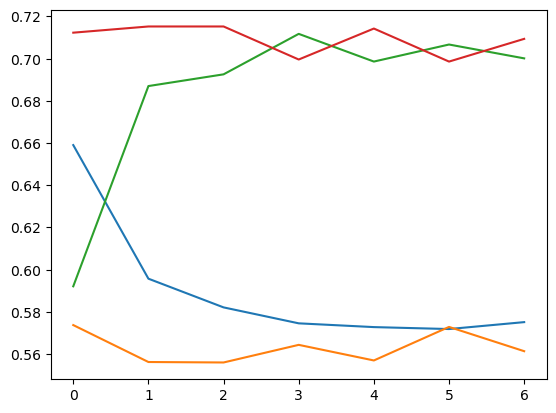

In [35]:
plt.plot(history1.history['loss'])

plt.plot(history1.history['val_loss'])

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

# GRU

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, SimpleRNN, Bidirectional, GRU
from tensorflow.keras.optimizers import RMSprop

In [37]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [39]:
model2 = Sequential()
model2.add(GRU(8, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model2.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [40]:
history2 = model2.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 8s 6ms/step - loss: 0.6106 - accuracy: 0.6689 - val_loss: 0.5630 - val_accuracy: 0.7319
Epoch 2/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5824 - accuracy: 0.7002 - val_loss: 0.5499 - val_accuracy: 0.7339
Epoch 3/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5738 - accuracy: 0.7037 - val_loss: 0.5473 - val_accuracy: 0.7309
Epoch 4/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5798 - accuracy: 0.7052 - val_loss: 0.5481 - val_accuracy: 0.7319
Epoch 5/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5768 - accuracy: 0.7108 - val_loss: 0.5461 - val_accuracy: 0.7319
Epoch 6/10
991/991 [==============================] - 5s 5ms/step - loss: 0.5576 - accuracy: 0.7178 - val_loss: 0.5443 - val_accuracy: 0.7329
Epoch 7/10
991/991 [==============================] - 6s 6ms/step - loss: 0.5634 - accuracy: 0.7128 - val_loss: 0.5440 - val_accuracy: 0.7348
Epoch 

In [41]:
y_pred_prob = model2.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

24/24 [==============================] - 0s 2ms/step


In [42]:
dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

In [43]:
storeResults('GRU',dl_acc,dl_prec,dl_rec,dl_f1)

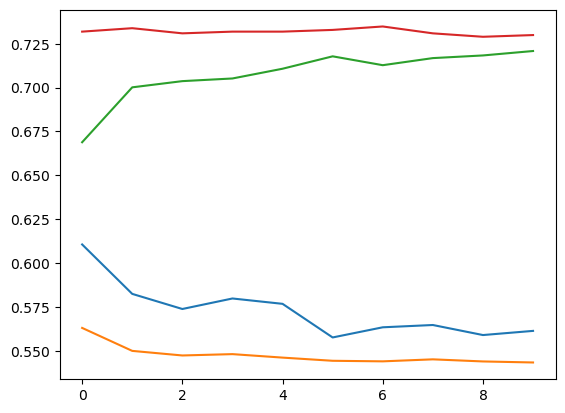

In [44]:
plt.plot(history2.history['loss'])

plt.plot(history2.history['val_loss'])

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

# EnsCVDDNet

In [45]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Reshape, GRU

In [47]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

In [48]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [49]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(GRU(50, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(100, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(150, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [50]:
model3 = build_model((X_train.shape[1], 1))
model3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 9, 32)             64        
                                                                 
 batch_normalization (BatchN  (None, 9, 32)            128       
 ormalization)                                                   
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 9, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 reshape (Reshape)           (None, 9, 32)            

In [51]:
history3 = model3.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 17s 13ms/step - loss: 0.6411 - accuracy: 0.6219 - val_loss: 0.5613 - val_accuracy: 0.7094
Epoch 2/10
991/991 [==============================] - 12s 12ms/step - loss: 0.6035 - accuracy: 0.6875 - val_loss: 0.5605 - val_accuracy: 0.7084
Epoch 3/10
991/991 [==============================] - 12s 12ms/step - loss: 0.5817 - accuracy: 0.6926 - val_loss: 0.5557 - val_accuracy: 0.7202
Epoch 4/10
991/991 [==============================] - 12s 12ms/step - loss: 0.5845 - accuracy: 0.7052 - val_loss: 0.5482 - val_accuracy: 0.7202
Epoch 5/10
991/991 [==============================] - 12s 12ms/step - loss: 0.5709 - accuracy: 0.7022 - val_loss: 0.5507 - val_accuracy: 0.7211
Epoch 6/10
991/991 [==============================] - 12s 12ms/step - loss: 0.5668 - accuracy: 0.7163 - val_loss: 0.5508 - val_accuracy: 0.7143
Epoch 7/10
991/991 [==============================] - 12s 12ms/step - loss: 0.5693 - accuracy: 0.7037 - val_loss: 0.5468 - val_accuracy:

In [52]:
y_pred_prob = model3.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

24/24 [==============================] - 1s 4ms/step


In [53]:
dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

In [54]:
storeResults('EnsCVDDNet',dl_acc,dl_prec,dl_rec,dl_f1)

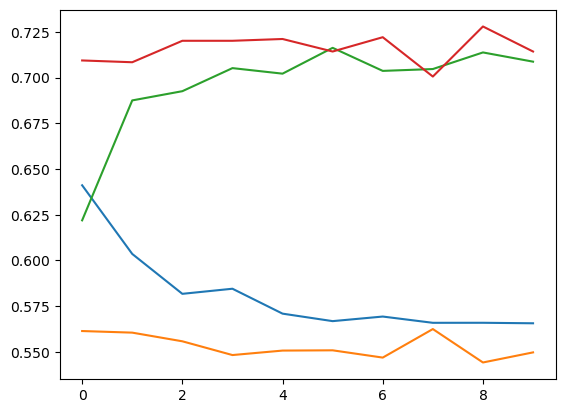

In [55]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

# BICVDD-Net

In [56]:
import tensorflow as tf

In [57]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(GRU(50, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(100, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [58]:
model4 = build_model((X_train.shape[1], 1))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 9, 32)             64        
                                                                 
 batch_normalization_1 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 9, 32)             0         
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 reshape_1 (Reshape)         (None, 9, 32)            

In [59]:
history4 = model4.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 15s 12ms/step - loss: 0.7332 - accuracy: 0.6452 - val_loss: 0.6513 - val_accuracy: 0.6296
Epoch 2/10
991/991 [==============================] - 11s 12ms/step - loss: 0.6440 - accuracy: 0.6586 - val_loss: 0.6229 - val_accuracy: 0.6796
Epoch 3/10
991/991 [==============================] - 11s 12ms/step - loss: 0.6362 - accuracy: 0.6612 - val_loss: 0.6292 - val_accuracy: 0.6781
Epoch 4/10
991/991 [==============================] - 11s 11ms/step - loss: 0.6282 - accuracy: 0.6667 - val_loss: 0.6277 - val_accuracy: 0.6794
Epoch 5/10
991/991 [==============================] - 11s 11ms/step - loss: 0.6282 - accuracy: 0.6686 - val_loss: 0.6193 - val_accuracy: 0.6795
Epoch 6/10
991/991 [==============================] - 11s 11ms/step - loss: 0.6259 - accuracy: 0.6713 - val_loss: 0.6353 - val_accuracy: 0.6816
Epoch 7/10
991/991 [==============================] - 11s 11ms/step - loss: 0.6272 - accuracy: 0.6660 - val_loss: 0.6125 - val_accuracy:

In [60]:
y_pred_prob = model3.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int64")

24/24 [==============================] - 0s 4ms/step


In [61]:
dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

In [62]:
storeResults('BICVDD-Net',dl_acc,dl_prec,dl_rec,dl_f1)

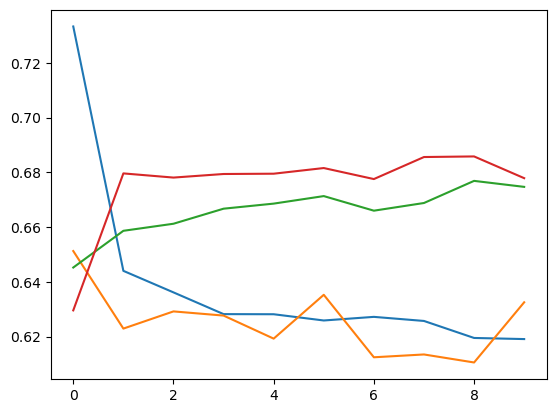

In [63]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

# LSTM

In [64]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model5.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history5 = model5.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 9s 7ms/step - loss: 0.6229 - accuracy: 0.6532 - val_loss: 0.5677 - val_accuracy: 0.7074
Epoch 2/10
991/991 [==============================] - 7s 7ms/step - loss: 0.5865 - accuracy: 0.6931 - val_loss: 0.5569 - val_accuracy: 0.7182
Epoch 3/10
991/991 [==============================] - 7s 7ms/step - loss: 0.5815 - accuracy: 0.7148 - val_loss: 0.5578 - val_accuracy: 0.7202
Epoch 4/10
991/991 [==============================] - 7s 7ms/step - loss: 0.5818 - accuracy: 0.7153 - val_loss: 0.5504 - val_accuracy: 0.7192
Epoch 5/10
991/991 [==============================] - 7s 7ms/step - loss: 0.5750 - accuracy: 0.7097 - val_loss: 0.5538 - val_accuracy: 0.7260
Epoch 6/10
991/991 [==============================] - 7s 7ms/step - loss: 0.5856 - accuracy: 0.7017 - val_loss: 0.5691 - val_accuracy: 0.6977
Epoch 7/10
991/991 [==============================] - 7s 7ms/step - loss: 0.5835 - accuracy: 0.7092 - val_loss: 0.5912 - val_accuracy: 0.6879
Epoch 

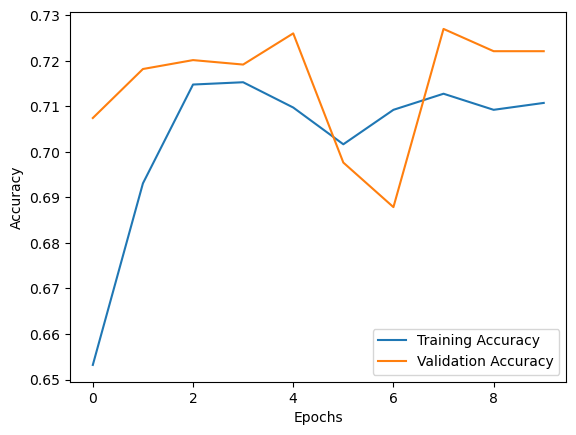

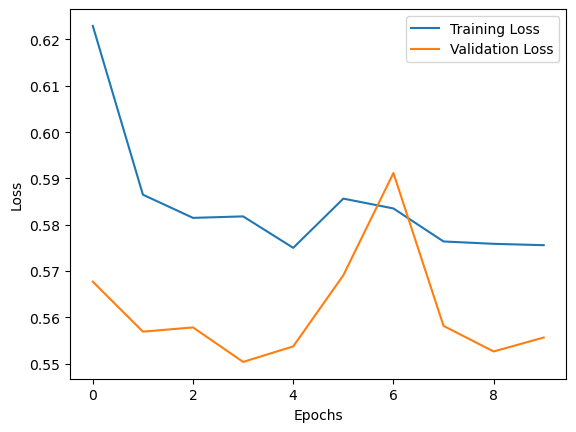

In [66]:
# Plotting akurasi
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
y_pred_prob = model5.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

24/24 [==============================] - 0s 2ms/step


In [68]:
storeResults('LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

# BiLSTM

In [69]:
model6 = Sequential()
model6.add(Bidirectional(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]))))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model6.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
history6 = model6.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 14s 11ms/step - loss: 0.6013 - accuracy: 0.6653 - val_loss: 0.5555 - val_accuracy: 0.7211
Epoch 2/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5769 - accuracy: 0.7193 - val_loss: 0.5538 - val_accuracy: 0.7172
Epoch 3/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5782 - accuracy: 0.7123 - val_loss: 0.5663 - val_accuracy: 0.7025
Epoch 4/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5848 - accuracy: 0.7082 - val_loss: 0.5553 - val_accuracy: 0.7162
Epoch 5/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5825 - accuracy: 0.7047 - val_loss: 0.5930 - val_accuracy: 0.7172
Epoch 6/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5806 - accuracy: 0.7183 - val_loss: 0.5795 - val_accuracy: 0.7182


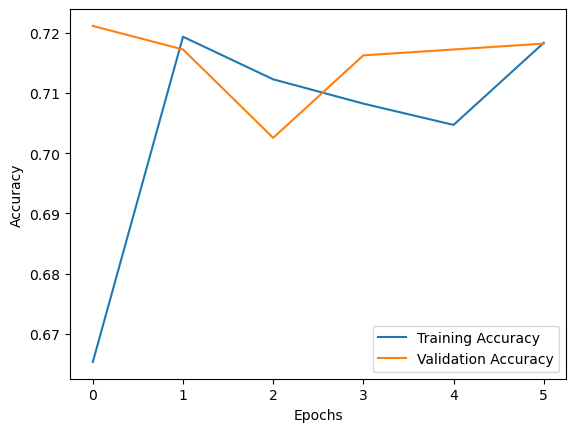

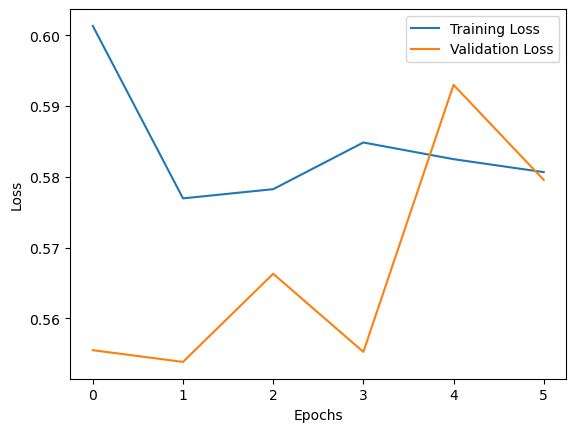

In [71]:
# Plotting akurasi
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
y_pred_prob = model6.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

24/24 [==============================] - 1s 3ms/step


In [73]:
storeResults('BiLSTM',dl_acc,dl_prec,dl_rec,dl_f1)

# CNN + LSTM

In [74]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

In [75]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Reshape, GRU

In [76]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(LSTM(50, activation='tanh', return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [77]:
model7 = build_model((X_train.shape[1], 1))
model7.compile(loss='binary_crossentropy', metrics=['accuracy'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 32)             64        
                                                                 
 batch_normalization_2 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten_3 (Flatten)         (None, 288)               0         
                                                                 
 reshape_2 (Reshape)         (None, 9, 32)            

In [78]:
history7 = model7.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
991/991 [==============================] - 12s 10ms/step - loss: 0.6858 - accuracy: 0.6921 - val_loss: 0.5882 - val_accuracy: 0.7172
Epoch 2/10
991/991 [==============================] - 9s 10ms/step - loss: 0.5844 - accuracy: 0.7138 - val_loss: 0.5756 - val_accuracy: 0.7211
Epoch 3/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5813 - accuracy: 0.7148 - val_loss: 0.5596 - val_accuracy: 0.7231
Epoch 4/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5783 - accuracy: 0.7128 - val_loss: 0.6430 - val_accuracy: 0.7221
Epoch 5/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5779 - accuracy: 0.7214 - val_loss: 0.5776 - val_accuracy: 0.7104
Epoch 6/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5840 - accuracy: 0.7138 - val_loss: 0.5652 - val_accuracy: 0.7211
Epoch 7/10
991/991 [==============================] - 10s 10ms/step - loss: 0.5781 - accuracy: 0.7284 - val_loss: 0.5552 - val_accuracy: 

In [79]:
y_pred_prob = model7.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred)
dl_rec = recall_score(y_test,y_pred)
dl_f1 = f1_score(y_test,y_pred)

24/24 [==============================] - 0s 2ms/step


In [80]:
storeResults('CNN+LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

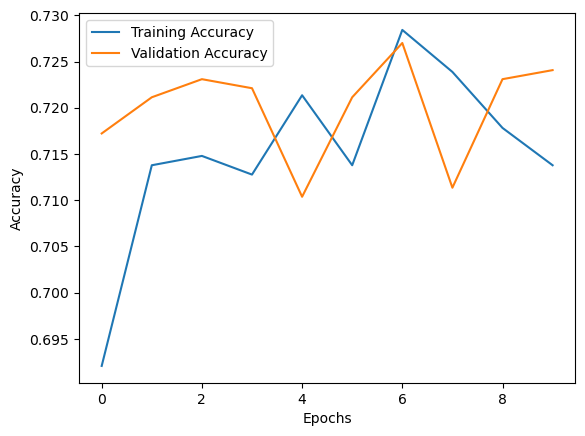

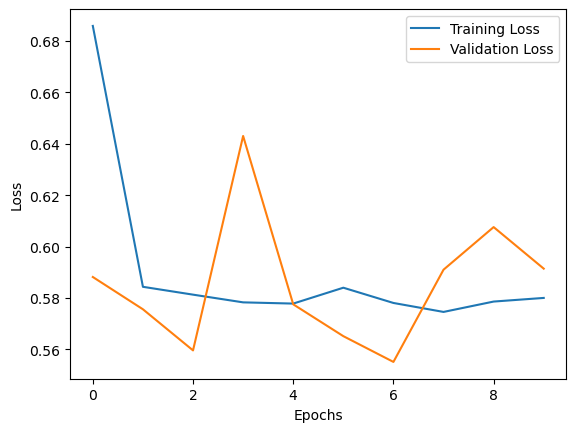

In [81]:
# Plotting akurasi
plt.plot(history7.history['accuracy'], label='Training Accuracy')
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history7.history['loss'], label='Training Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ML

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# AdaBoost

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

y_pred    = ada.predict(X_test)

ada_acc = accuracy_score(y_pred, y_test)
ada_prec = precision_score(y_pred, y_test,average='weighted')
ada_rec = recall_score(y_pred, y_test,average='weighted')
ada_f1 = f1_score(y_pred, y_test,average='weighted')

In [84]:
storeResults('AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1)

# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [86]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# SVM

In [87]:
from sklearn import svm
svc = svm.SVC(decision_function_shape='ovo',probability=True)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [88]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# XGBoost

In [89]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=300)
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [90]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred    = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [92]:
storeResults('NaiveBayes',nb_acc,nb_prec,nb_rec,nb_f1)

# LogisticRegression

In [93]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [94]:
storeResults('LogisticRegression',lr_acc,lr_prec,lr_rec,lr_f1)

# DecisionTree

In [95]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [96]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Extension

In [124]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

bet = BaggingClassifier(ExtraTreesClassifier())

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

model = VotingClassifier(estimators= [('BoostDT', bdt),('RF', rf),('BagET', bet)], voting='soft')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ext_acc = accuracy_score(y_pred, y_test)
ext_prec = precision_score(y_pred, y_test,average='weighted')
ext_rec = recall_score(y_pred, y_test,average='weighted')
ext_f1 = f1_score(y_pred, y_test,average='weighted')

In [128]:
storeResults('Extension',ext_acc,ext_prec,ext_rec,ext_f1)

# Comparison

In [129]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [130]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,LeNet,0.716,0.735,0.765,0.750
1,GRU,0.704,0.749,0.703,0.725
2,EnsCVDDNet,0.662,0.757,0.576,0.654
3,BICVDD-Net,0.662,0.757,0.576,0.654
4,LSTM,0.686,0.754,0.645,0.695
5,BiLSTM,0.699,0.704,0.791,0.745
6,CNN+LSTM,0.684,0.760,0.631,0.689
7,AdaBoost,0.708,0.710,0.708,0.709
8,KNN,0.662,0.662,0.662,0.662
9,SVM,0.702,0.704,0.702,0.703


# Modelling

In [131]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

# Graph

In [132]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

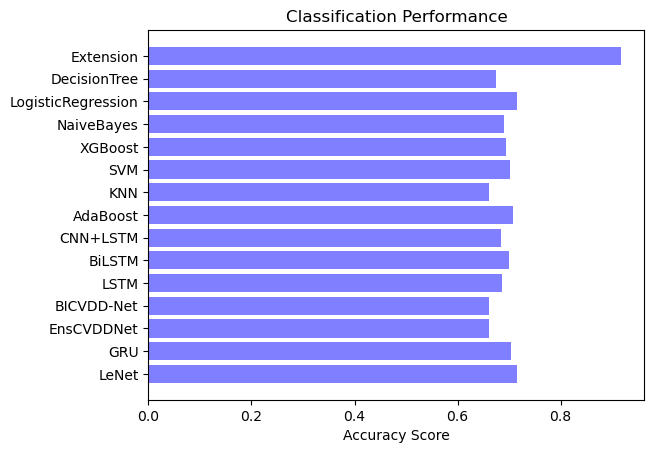

In [133]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

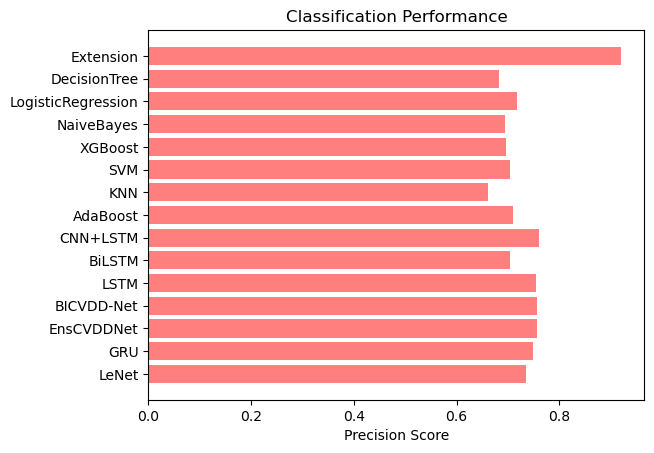

In [134]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

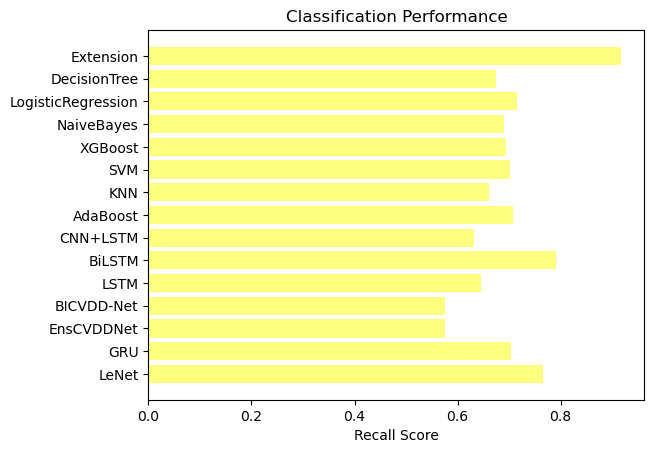

In [135]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

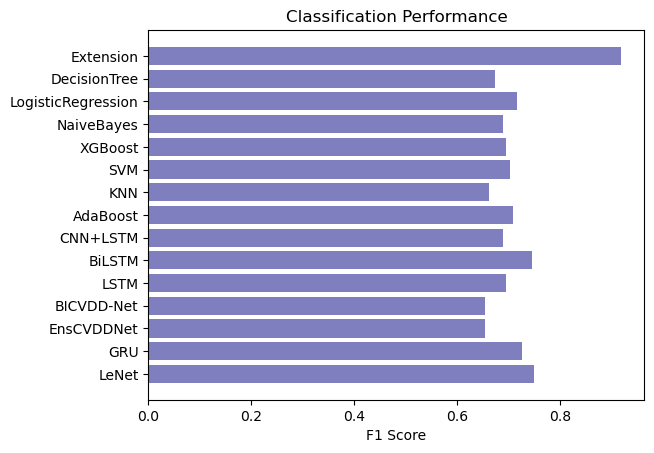

In [136]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()


# Prediction

In [138]:
import joblib

In [141]:
int_features= [0,0,1,34,0,0,0,3,0
]
print(int_features,len(int_features))
final4=[np.array(int_features)]
model = joblib.load('model.sav')
    
predict = model.predict(final4)

[0, 0, 1, 34, 0, 0, 0, 3, 0] 9


In [142]:
predict

array([0])